In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

In [2]:
# 1. Load IMDB dataset (only keep top 10,000 most frequent words)
vocab_size = 10000
maxlen = 256

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# 2. Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


17464789/17464789 [==============================] - 4s 0us/step


In [3]:
# Show dataset details
print(f"Number of training samples: {len(x_train)}")
print(f"Number of test samples: {len(x_test)}")


Number of training samples: 25000
Number of test samples: 25000


In [4]:
print(x_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    1   14   22   16
   43  530  973 1622 1385   65  458 4468   66 3941    4  173   36  256
    5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76
   15   13 1247    4   22   17  515   17   12   16  626   18    2    5
   62  386   12    8  316    8  106    5    4 2223 5244   16  480   66
 3785   33    4  130   12   16   38  619    5   25  124   51   36  135
   48   25 1415   33    6   22   12  215   28   77   52    5   14  407
   16   82    2    8    4  107  117 5952   15  256    4    2    7 3766
    5  723   36   71   43  530  476   26  400  317   46    7    4    2
 1029 

In [31]:
print(f"Label: {y_train[0]}")

Label: 1


In [6]:
# Decode review using word index   (Completely optional, rather for understanding the data, straightaway ignore this cell if you want)
word_index = imdb.get_word_index()
reverse_word_index = {value + 3: key for key, value in word_index.items()}
reverse_word_index[0] = '<PAD>'
reverse_word_index[1] = '<START>'
reverse_word_index[2] = '<UNK>'
reverse_word_index[3] = '<UNUSED>'

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i, '?') for i in encoded_review])

print("\nDecoded review:")
print(decode_review(x_train[0]))

1641221/1641221 [==============================] - 0s 0us/step

Decoded review:
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely

In [29]:
# Let's quickly decode a review

# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
#
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in x_train[1]])

decoded_review

"? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster tha

In [12]:
# 3. Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=maxlen),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
# 4. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
# 5. Train the model
history = model.fit(
    x_train, y_train,
    epochs=25,
    batch_size=512,
    validation_split=0.2,
    verbose=2
)

Epoch 1/25
40/40 - 1s - loss: 0.6920 - accuracy: 0.5326 - val_loss: 0.6896 - val_accuracy: 0.7524 - 1s/epoch - 29ms/step
Epoch 2/25
40/40 - 0s - loss: 0.6856 - accuracy: 0.7301 - val_loss: 0.6791 - val_accuracy: 0.7466 - 395ms/epoch - 10ms/step
Epoch 3/25
40/40 - 0s - loss: 0.6698 - accuracy: 0.7419 - val_loss: 0.6557 - val_accuracy: 0.7764 - 425ms/epoch - 11ms/step
Epoch 4/25
40/40 - 0s - loss: 0.6374 - accuracy: 0.7962 - val_loss: 0.6148 - val_accuracy: 0.7920 - 398ms/epoch - 10ms/step
Epoch 5/25
40/40 - 0s - loss: 0.5879 - accuracy: 0.8128 - val_loss: 0.5608 - val_accuracy: 0.8108 - 421ms/epoch - 11ms/step
Epoch 6/25
40/40 - 0s - loss: 0.5273 - accuracy: 0.8367 - val_loss: 0.5032 - val_accuracy: 0.8246 - 389ms/epoch - 10ms/step
Epoch 7/25
40/40 - 0s - loss: 0.4656 - accuracy: 0.8560 - val_loss: 0.4505 - val_accuracy: 0.8458 - 378ms/epoch - 9ms/step
Epoch 8/25
40/40 - 0s - loss: 0.4109 - accuracy: 0.8697 - val_loss: 0.4087 - val_accuracy: 0.8558 - 366ms/epoch - 9ms/step
Epoch 9/25
40

In [15]:
# 6. Evaluate on test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

782/782 [==============================] - 1s 808us/step - loss: 0.2954 - accuracy: 0.8802

Test Accuracy: 0.8802


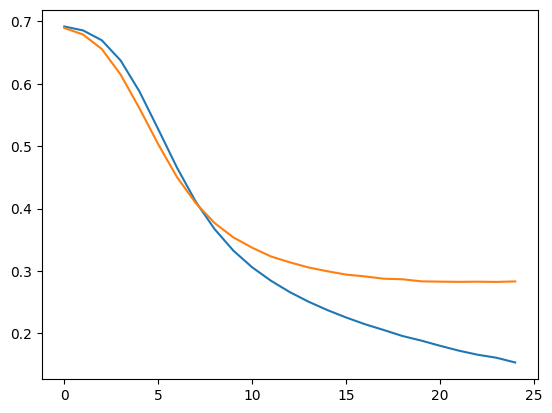

In [16]:
# plot training history
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'], label='train loss')  
plt.plot(history.history['val_loss'], label='validation loss')

In [26]:
# classification report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(x_test)
y_pred = np.where(y_pred > 0.5, 1, 0).flatten()
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

782/782 [==============================] - 1s 750us/step
              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88     12500
    Positive       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

